In [1]:
from tensorflow import lite
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random, os
import cv2
import shutil
import keras
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_accuracy
from sklearn.model_selection import train_test_split

2024-02-12 09:32:34.679129: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 09:32:34.679186: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 09:32:34.680708: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.read_csv("/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/train.csv")

diagnosis_binary = {
        0: 'No_DR',
        1: 'DR',
        2: 'DR',
        3: 'DR',
        4: 'DR'}

diagnosis_classes = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}


df["binary"] = df["diagnosis"].map(diagnosis_binary.get)
df["type"] = df["diagnosis"].map(diagnosis_classes.get)

In [3]:
df.head()

,id_code,diagnosis,binary,type
0,000c1434d8d7,2,DR,Moderate
1,001639a390f0,4,DR,Proliferate_DR
2,0024cdab0c1e,1,DR,Mild
3,002c21358ce6,0,No_DR,No_DR
4,005b95c28852,0,No_DR,No_DR


<Axes: ylabel='type'>

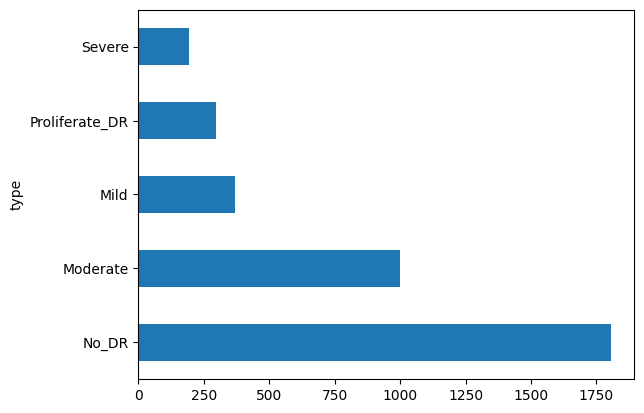

In [8]:
df['type'].value_counts().plot(kind='barh')

<Axes: ylabel='binary'>

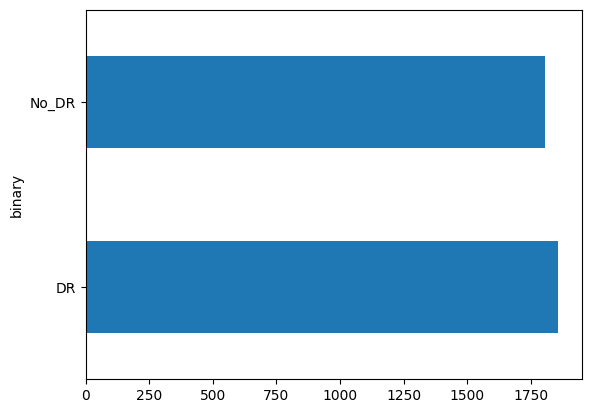

In [5]:
df['binary'].value_counts().plot(kind='barh')

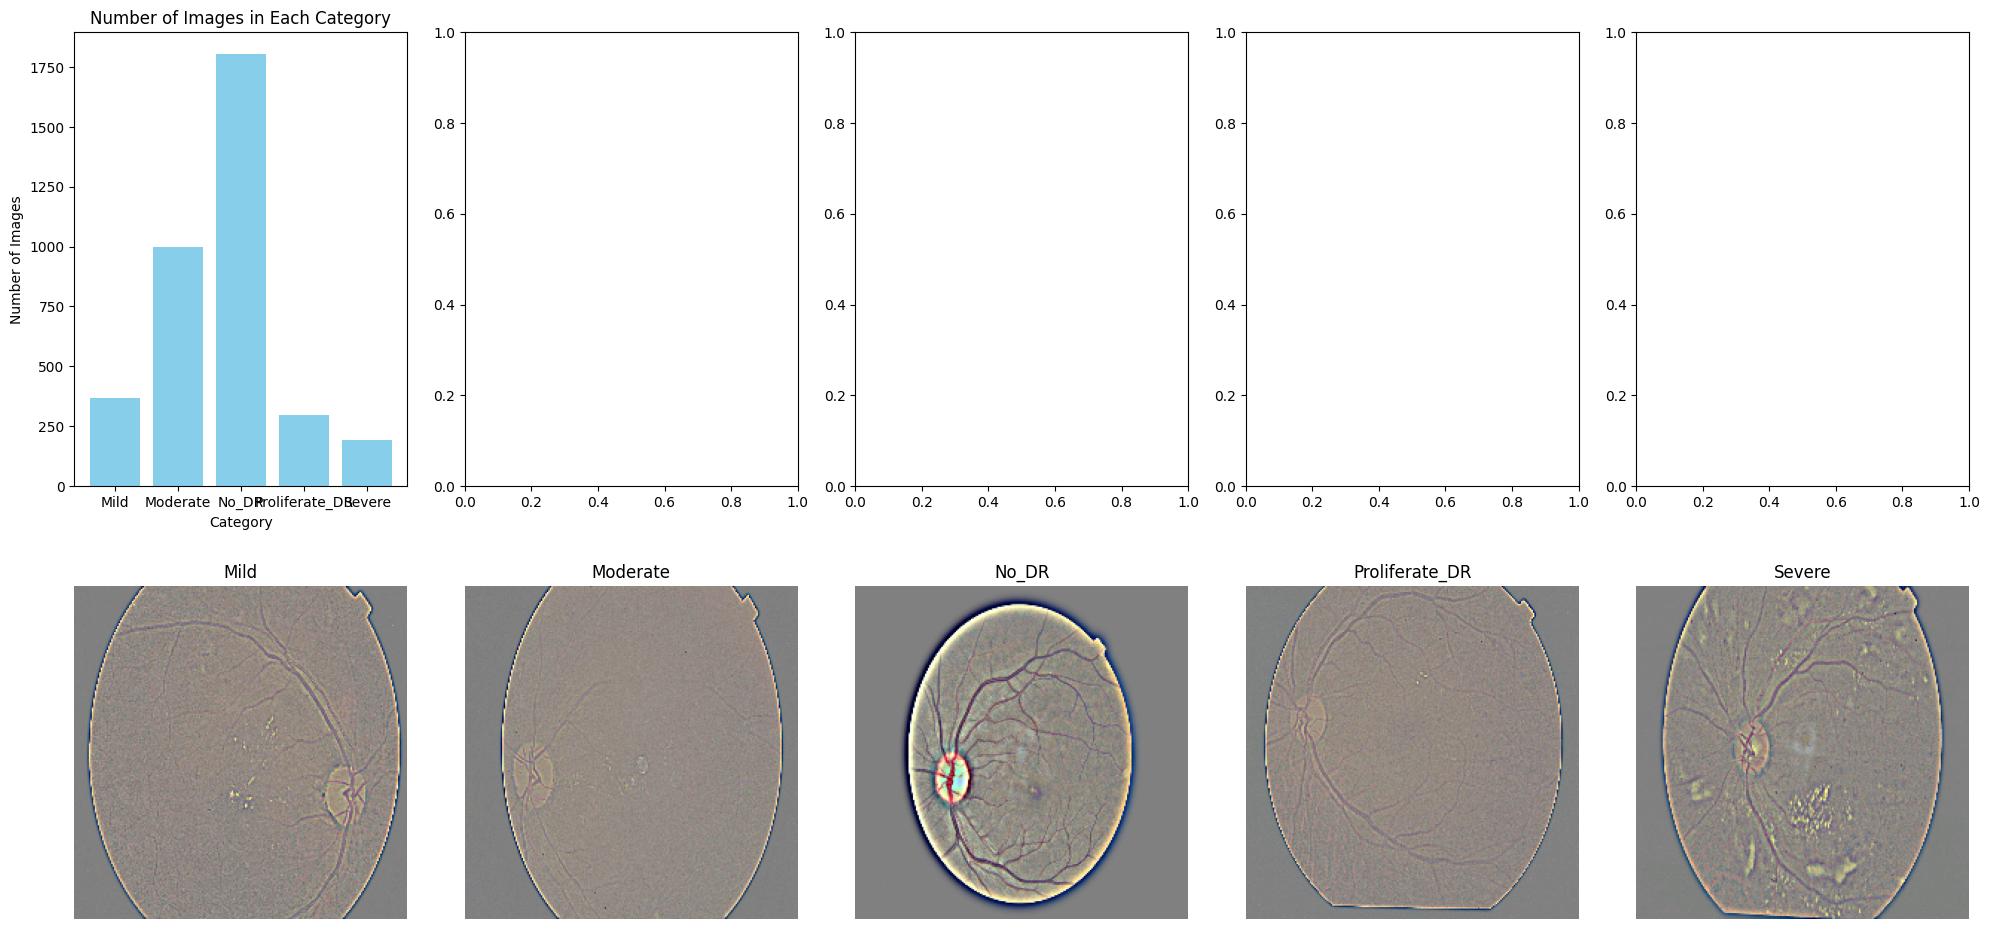

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the dataset directory
dataset_dir = '/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images'

# List of categories (subdirectories)
categories = ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

# Dictionary to store the count of images in each category
image_count = {}

# Iterate through each category
for category in categories:
    # Construct the path to the category directory
    category_dir = os.path.join(dataset_dir, category)
    
    # Count the number of images in the category directory
    num_images = len(os.listdir(category_dir))
    
    # Store the count in the image_count dictionary
    image_count[category] = num_images

# Create a figure with subplots for the bar graph and sample images
fig, axes = plt.subplots(nrows=2, ncols=len(categories), figsize=(20, 10))

# Create a bar graph
axes[0, 0].bar(image_count.keys(), image_count.values(), color='skyblue')
axes[0, 0].set_title('Number of Images in Each Category')
axes[0, 0].set_xlabel('Category')
axes[0, 0].set_ylabel('Number of Images')

# Iterate through each category to display one image
for i, category in enumerate(categories):
    # Construct the path to the first image in the category directory
    category_dir = os.path.join(dataset_dir, category)
    image_path = os.path.join(category_dir, os.listdir(category_dir)[0])
    
    # Load and display the image
    image = mpimg.imread(image_path)
    axes[1, i].imshow(image)
    axes[1, i].set_title(category)
    axes[1, i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [7]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
!pip install imutils
from imutils import paths
from sklearn.utils import shuffle

In [9]:
data = []
labels = []
width,height=224,224

imagePaths = list(paths.list_images('/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images'))

data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]   
    image = load_img(imagePath, target_size=(width, height))
    image = img_to_array(image)
    data.append(image)
    labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

data, labels = shuffle(data, labels)

print(data.shape)
print(labels.shape)

(3662, 224, 224, 3)
(3662, 5)


In [10]:
data = data / 255.0

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=.2)

print("Train images:",x_train.shape)
print("Test images:",x_test.shape)
print("Train label:",y_train.shape)
print("Test label:",y_test.shape)

Train images: (2929, 224, 224, 3)
Test images: (733, 224, 224, 3)
Train label: (2929, 5)
Test label: (733, 5)


In [16]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.2)

print("Train images:",x_train.shape)
print("Test images:",x_val.shape)
print("Train label:",y_train.shape)
print("Test label:",y_val.shape)

Train images: (2343, 224, 224, 3)
Test images: (586, 224, 224, 3)
Train label: (2343, 5)
Test label: (586, 5)


In [17]:
from keras.models import Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from keras import layers

In [18]:
Vgg16 = VGG16(include_top=False, input_shape= (224,224,3)) 

Vgg16.trainable=False

In [19]:
model = Sequential()
model.add(Vgg16)
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64 , activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(32 , activation="relu"))
#model.add(Dropout(0.25))
model.add(Dense(5 , activation="sigmoid"))

model.compile( optimizer="adam" , loss="binary_crossentropy" , metrics="binary_accuracy" )

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 512)         0         
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                1605696   
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 5)                

In [21]:
callbacks = [EarlyStopping(monitor='val_binary_accuracy' , patience=10 , restore_best_weights=True)]

history = model.fit(x_train , y_train , epochs=50 , batch_size=64,
                    validation_data=(x_val,y_val), verbose=1 , callbacks = callbacks)

Epoch 1/50


2024-02-12 09:39:04.028393: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1707730764.140975     279 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


37/37 [==============================] - 49s 744ms/step - loss: 0.4087 - binary_accuracy: 0.8335 - val_loss: 0.2911 - val_binary_accuracy: 0.8812
Epoch 2/50
37/37 [==============================] - 13s 347ms/step - loss: 0.3059 - binary_accuracy: 0.8782 - val_loss: 0.2581 - val_binary_accuracy: 0.8884
Epoch 3/50
37/37 [==============================] - 13s 347ms/step - loss: 0.2837 - binary_accuracy: 0.8869 - val_loss: 0.2628 - val_binary_accuracy: 0.8949
Epoch 4/50
37/37 [==============================] - 13s 352ms/step - loss: 0.2724 - binary_accuracy: 0.8873 - val_loss: 0.2480 - val_binary_accuracy: 0.8911
Epoch 5/50
37/37 [==============================] - 13s 355ms/step - loss: 0.2651 - binary_accuracy: 0.8910 - val_loss: 0.2496 - val_binary_accuracy: 0.8908
Epoch 6/50
37/37 [==============================] - 13s 360ms/step - loss: 0.2570 - binary_accuracy: 0.8951 - val_loss: 0.2521 - val_binary_accuracy: 0.9034
Epoch 7/50
37/37 [==============================] - 13s 363ms/step - 

In [22]:
def plot_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["binary_accuracy"]
  val_accuracy = history.history["val_binary_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

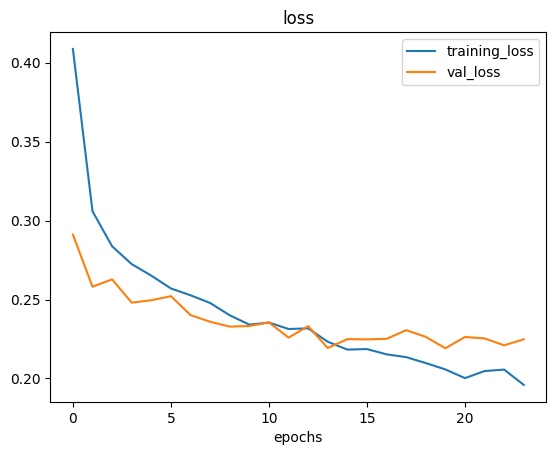

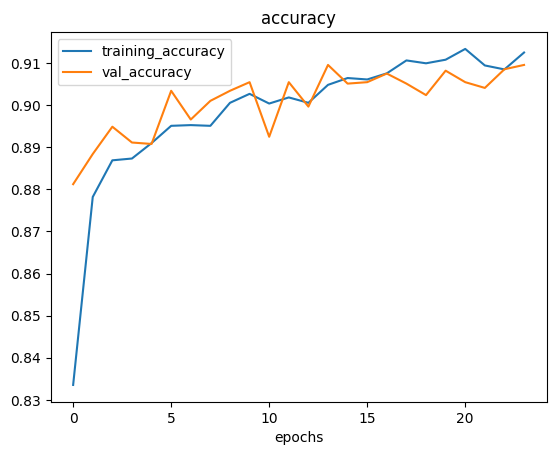

In [23]:
plot_curves(history)

In [24]:
score = model.evaluate(x_test,y_test)

23/23 [==============================] - 19s 479ms/step - loss: 0.2323 - binary_accuracy: 0.9075


In [25]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

23/23 [==============================] - 3s 122ms/step


[0 0 1 0 0]
Prediction: NO_DR


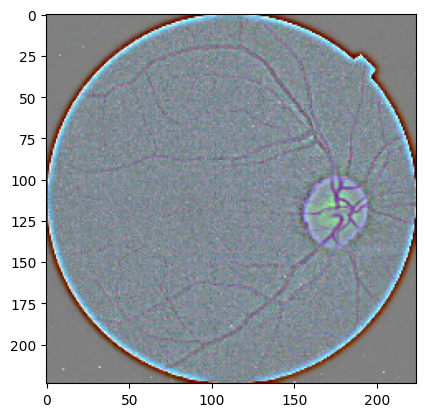

In [28]:
index =24
predictions=["Mild","Moderate","NO_DR","Proliferate_DR","Severe"] 

img = x_test[index]
RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
RGBImg= cv2.resize(RGBImg,(224,224))

plt.imshow(RGBImg)
print(y_test[index]) # true
print(f"Prediction: {predictions[pred[index]]}") # predicted  

In [29]:
import cv2

def predict_new(path):
    img = cv2.imread(path)

    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGBImg= cv2.resize(RGBImg,(224,224))
    plt.imshow(RGBImg)
    image = np.array(RGBImg) / 255.0

    predict=model.predict(np.array([image]))
    pred=np.argmax(predict,axis=1)
    
    print(f"Predicted: {predictions[pred[0]]}")

1/1 [==============================] - 0s 19ms/step
Predicted: NO_DR


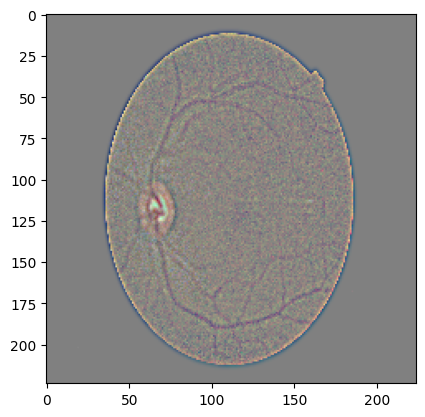

In [32]:
predict_new("/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/No_DR/005b95c28852.png")
#True --> Mild

23/23 [==============================] - 3s 115ms/step


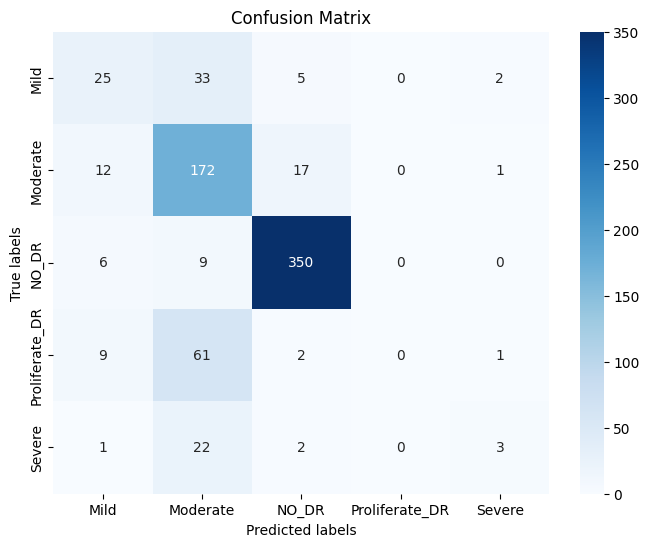

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predictions for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes for the test set
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=predictions, yticklabels=predictions)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
